In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [3]:
dir_name = os.getcwd() + '/saved_data/data_001'

In [5]:
with h5py.File(dir_name + '/data.h5', 'r') as f:
    t_recorded_samples = np.array(f['t'])
    snapshot_idx = int(t_recorded_samples.shape[0] / 2)
    
    N = int(0.5*(np.array(f['num_wavenumbers'])-1))
    print(N, type(N))

    D = np.array(f['Dissipation'])

    uh = np.empty(shape=(len(t_recorded_samples), 2*N+1, 2*N+1), dtype=np.complex128)
    uh[:, :, N:] = np.array(f['uh'])
    uh[:, 0:N, 0:N] = np.conjugate(uh[:, N+1:, N+1:][:, ::-1, ::-1])
    uh[:, N+1:, 0:N] = np.conjugate(uh[:, 0:N, N+1:][:, ::-1, ::-1])
    
    vh = np.empty(shape=(len(t_recorded_samples), 2*N+1, 2*N+1), dtype=np.complex128)
    vh[:, :, N:] = np.array(f['vh'])
    vh[:, 0:N, 0:N] = np.conjugate(vh[:, N+1:, N+1:][:, ::-1, ::-1])
    vh[:, N+1:, 0:N] = np.conjugate(vh[:, 0:N, N+1:][:, ::-1, ::-1])

T = t_recorded_samples[-1]

16 <class 'int'>


In [7]:
u = np.fft.ifft2(np.fft.ifftshift(uh, axes=(-2, -1))).real
del(uh)
v = np.fft.ifft2(np.fft.ifftshift(vh, axes=(-2, -1))).real
del(vh)

In [33]:
u = u - np.mean(u, axis=0)
v = v - np.mean(v, axis=0)

KE = 0.5 * (u*u + v*v)
KE = np.sum(KE, axis=(-2, -1))

In [40]:
xmin = 4000
xmax = xmin + 300

dTr = t_recorded_samples[2] - t_recorded_samples[1]

xmin_idx = int(np.round((xmin + 0.5*dTr) / dTr))
xmax_idx = int(np.round((xmax + 0.5*dTr) / dTr))

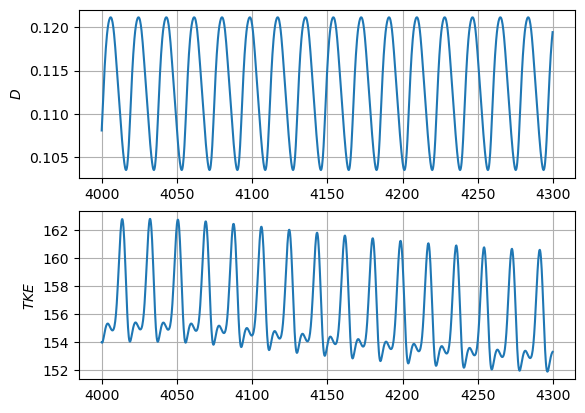

In [41]:
fig, ax = plt.subplots(2)

ax[0].plot(t_recorded_samples[xmin_idx:xmax_idx], D[xmin_idx:xmax_idx])
ax[0].grid(True)
ax[0].set_ylabel(r'$D$')

ax[1].plot(t_recorded_samples[xmin_idx:xmax_idx], KE[xmin_idx:xmax_idx])
ax[1].grid(True)
ax[1].set_ylabel(r'$TKE$')

plt.show()